<a href="https://colab.research.google.com/github/PedroMurta/Projetos-Data-Science/blob/master/An%C3%A1lise_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama Corona Vírus(COVID-19)

A COVID-19 é uma doença infecciosa causada por um coronavírus recém-descoberto. Coronavírus é uma família de vírus que causam infecções respiratórias. O novo agente do coronavírus (nCoV-2019) foi descoberto em 31/12/19 após casos registrados na China.

A maioria das pessoas que adoece em decorrência da COVID-19 apresentará sintomas leves a moderados e não precisará de tratameto especial para se recuperar, mas a gravidade dos sintomas varia de pessoa para pessoa por diversos fatores, como idade, problemas respiratórios e diversos outros.

O vírus que causa a COVID-19 é transmitido principalmente por meio da tosse e espirro. Você pode ser infectado ao inalar o vírus se estiver próximo de alguém que tenha COVID-19 ou ao tocar em uma superfície contaminada e, em seguida, passar as mãos nos olhos, no nariz ou na boca.

<img src="https://pfarma.com.br/images/noticias/coronavirus-covid-19.jpg" />


Pouco se sabe a respeito do COVID-19, diversos estudos estão sendo realizados no mundo inteiro e ainda não temos resultados conclusivos e definitivos.
* Até o momento, 80% dos casos confirmados são assintomáticos e rápidos, grande parte dos casos desse grupo se recupera sem nenhuma sequela.
* No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. Os outros 5% são classificados como infecções muito graves e precisarão de ventilação assistida por meio de respiradores
mecânicos em hospitais.

## Obtenção dos dados

 > A base de dados usada nesse projeto foi retirada do site: [Our World in Data](https://ourworldindata.org/coronavirus). Essa base é atualizada diariamente e inclui casos confirmados, mortes, testes e outras variáveis de potencial interesse. Usaremos o arquivo no formato csv.
 
 saiba mais: [Data on COVID-19 by Our World in Data](https://github.com/owid/covid-19-data/tree/master/public/data)

## Dicionário de Variáveis

|       Coluna        |     Descrição       |
| ------------------- | ------------------- |
|  iso_code           |  Códio de 3 letras do país |
|  continent |  Continente geográfico |
| location | Local geográfico |
| date | Data de observação |
| total_cases | Total de casos confirmados de COVID-19 |
| new_cases |   Novos casos confirmados de COVID-19 |
| total_deaths |   Quantidade mortes Confirmadas por COVID-19  |
|  total_cases_per_million |   Novas mortes confirmadas por COVID-19  |
| new_cases_per_million |   Novos casos confirmados por 1 milhão de pessoas |   
| total_deaths_per_million |   Novas mortes confirmadas por 1 milhão de pessoas |
| new_deaths_per_million |   Novas mortes confirmadas por 1 milhão de pessoas  |
| total_tests |   Quantidade total de testes para COVID-19  |
| new_tests| Novos testes para COVID-19 |
| new_tests_smoothed |   Novos testes para COVID-19 suavizado por 7 dias  |
| total_test_per_thousand |   Quantidade de testes por mil pessoas  |
| new_tests_per_thousand |   Novos testes por mil pessoas   |
| new_tests_smoothed_per_thousand |   Novos testes para COVID-19 suavizado por 7 dias por mil pessoas |
| tests_units |  Unidades usadas pelo local para relatar seus dados de teste  |
| stringency_index | Índice de Estresse da Resposta do Governo |
| population |   População em 2020  |
| population_density |   Densidade populacional. Número de pessoas por Km²  |
| median_age |   Média da idade da população  |
| aged_65_older |   Quantidade da população que tem idade maior que  65 anos  |
| aged_70_older |   Quantidade da população que tem idade maior que  70 anos  |
| gdp_per_capta |   PIB |
| extreme_poverty |   Quantidade de pessoas que vivem em extrema pobreza |
| cvd_death_rate |   Morte por doenças cardiovasculares   |
| diabetes_prevalence |   Prevalência de diabetes |
| female_smokers |  Mulheres que fumam   |
| male_smokers |   Homens que fumam  |
| handwashing_facilities |   População com instalações básicas de lavagem das mãos  |
| hospital_beds_per_thousand |   Leitos de hospitais por mil pessoas  |
| life_expetancy |   Expectativa de vida  |

In [2]:
# Importando as bibliotecas necessárias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# importar o dataset para um DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/owid-covid-data.csv")

# Análise Exploratória dos Dados

> ### A primeira coisa que faremos após importar o dataset será examinar as dimensões do *DataFrame* e as primeiras entradas. Isso nos dá uma visão da situação inicial a respeito das entradas e da estrutura geral dos nossos dados.  É importante verificar o nome, tipo, porcentagem de valores faltantes, presença de outliers, etc.

In [4]:
# Extrair as primeiras 5 linhas
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5


In [5]:
# Verificar o nome das colunas
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand'],
      dtype='object')

In [6]:
# Verificar o tamanho do DataFrame
df.shape

(24023, 33)

In [7]:
print(f'Dimensões do DataFrame: ')
print(f'Linhas = {df.shape[0]}')
print(f'Colunas = {df.shape[1]}')

Dimensões do DataFrame: 
Linhas = 24023
Colunas = 33


In [8]:
# Verificar o tipo das variáveis
df.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_old

> ### Podemos ver que a coluna date está no formato object, para trabalharmos com ela, precisaremos transformar ela em datetime.

In [9]:
df.date = pd.to_datetime(df.date)

In [10]:
df.dtypes

iso_code                                   object
continent                                  object
location                                   object
date                               datetime64[ns]
total_cases                               float64
new_cases                                 float64
total_deaths                              float64
new_deaths                                float64
total_cases_per_million                   float64
new_cases_per_million                     float64
total_deaths_per_million                  float64
new_deaths_per_million                    float64
total_tests                               float64
new_tests                                 float64
total_tests_per_thousand                  float64
new_tests_per_thousand                    float64
new_tests_smoothed                        float64
new_tests_smoothed_per_thousand           float64
tests_units                                object
stringency_index                          float64


> ### A coluna date está no formato datetime agora, nosso próximo passo é ver a porcentagem de valores ausentes das colunas.

In [11]:
(df.isnull().sum() / df.shape[0] ).sort_values(ascending=False)

new_tests                          0.759397
new_tests_per_thousand             0.759397
total_tests                        0.731632
total_tests_per_thousand           0.731632
new_tests_smoothed                 0.709070
new_tests_smoothed_per_thousand    0.709070
tests_units                        0.683928
handwashing_facilities             0.596262
extreme_poverty                    0.401657
male_smokers                       0.277775
female_smokers                     0.269533
stringency_index                   0.208425
hospital_beds_per_thousand         0.168755
aged_65_older                      0.107147
gdp_per_capita                     0.104317
aged_70_older                      0.099155
median_age                         0.094534
cvd_death_rate                     0.093619
diabetes_prevalence                0.064438
population_density                 0.042543
new_cases_per_million              0.011739
new_deaths_per_million             0.011739
total_deaths_per_million        

> ### Há uma grande porcentagem de valores faltantes no nosso dataset, mas não trabalharemos com eles por enquanto. Estaremos usando colunas como *'total_deaths'*, *'total_cases'* e *'date'* que possuem quase todos os registros preenchidos.

> ### Agora vamos analisar quais países tem mais casos e mortes para a data mais recente: 

In [12]:
# Total de casos sem o valor 'world', que é a soma de todos. 
df.loc[df.date == '2020-06-14', ['location', 'total_cases', 'total_deaths']].sort_values(by='total_cases', ascending=False)[1:6]

,location,total_cases,total_deaths
22873,United States,2074526.0,115436.0
3263,Brazil,850514.0,42720.0
18170,Russia,520129.0,6829.0
10140,India,320922.0,9195.0
22705,United Kingdom,294375.0,41662.0


In [14]:
# Total de mortes sem o valor 'world', que é a soma de todos.
df.loc[df.date == '2020-06-14', ['location', 'total_cases', 'total_deaths']].sort_values(by='total_deaths', ascending=False)[1:6]

,location,total_cases,total_deaths
22873,United States,2074526.0,115436.0
3263,Brazil,850514.0,42720.0
22705,United Kingdom,294375.0,41662.0
11225,Italy,236651.0,34301.0
7839,France,156813.0,29398.0


> ### Podemos também ver quais são os países que tiveram menos casos e menos mortes.

In [15]:
# Total de mortes
df.loc[df.date == '2020-06-14', ['location', 'total_cases', 'total_deaths']].sort_values(by='total_deaths', ascending=True)[1:7]

,location,total_cases,total_deaths
2924,Bonaire Sint Eustatius and Saba,7.0,0.0
7342,Faeroe Islands,187.0,0.0
3869,Cambodia,128.0,0.0
15234,Namibia,32.0,0.0
22281,Uganda,685.0,0.0
8968,Grenada,23.0,0.0


In [16]:
# Total de casos
df.loc[df.date == '2020-06-14', ['location', 'total_cases', 'total_deaths']].sort_values(by='total_cases', ascending=True)[1:7]

,location,total_cases,total_deaths
12601,Lesotho,4.0,0.0
2924,Bonaire Sint Eustatius and Saba,7.0,0.0
3344,British Virgin Islands,8.0,1.0
17011,Papua New Guinea,8.0,0.0
14841,Montserrat,11.0,1.0
19169,Seychelles,11.0,0.0


> ### Agora vamos dar uma olhada nesses dados olhando para o tamanho da população.

In [39]:
# Total de casos pelo tamanho da população
df.loc[df.date == '2020-06-14', ['location', 'population','total_cases', 'total_deaths']].sort_values(by='population', ascending=False)[1:7]

,location,population,total_cases,total_deaths
4758,China,1.439324e+09,84288.0,4638.0
10140,India,1.380004e+09,320922.0,9195.0
22873,United States,3.310026e+08,2074526.0,115436.0
10301,Indonesia,2.735236e+08,37420.0,2091.0
16726,Pakistan,2.208923e+08,139230.0,2632.0
3263,Brazil,2.125594e+08,850514.0,42720.0


> ### Temos a China e a Índia como os países de maior população, mas não são os países que mais tem casos de pessoas contaminadas e com mais mortes registradas. Podemos afirmar com essa informação que é possível diminuir o contágio dessa doença.

> ### Para melhorar ainda mais a nossa visualização, vamos analisar os 5 países com mais mortes em gráfico.

In [17]:
top_5_mortes = df.loc[df.date == '2020-06-14', ['location', 'total_cases', 'total_deaths']].sort_values(by='total_deaths', ascending=False)[1:6]
sns.set()

# Gráfico com Matplotlib
# fig, ax = plt.subplots()
# ax.bar('location', 'total_deaths', data=top_5_mortes)
# ax.set_xlabel('País')
# ax.set_ylabel("Quantidade de Mortes")
# fig.autofmt_xdate()
# plt.show()


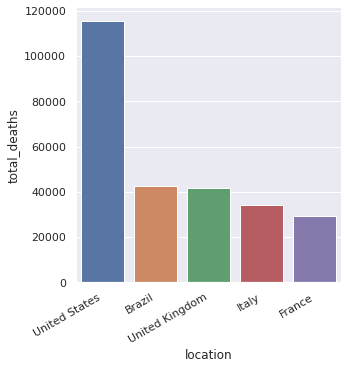

In [18]:
# Gráfico com Seaborn
g = sns.catplot(x="location", y="total_deaths", kind="bar", data=top_5_mortes);
g.fig.autofmt_xdate()
plt.show()

> Podemos notar que os Estados Unidos estão com uma quantidade enorme de mortes quando comparado ao resto do mundo, pelo menos 2x mais que o Brasil, que é o 2º país dessa triste lista.
> Depois dos EUA, Brasil e Reino Unido estão com a quantidade de mortos bem próximos, em seguida temos a Itália e a França completando os 5 países com mais casos de morte registrados(até o dia 14/06/2020). 

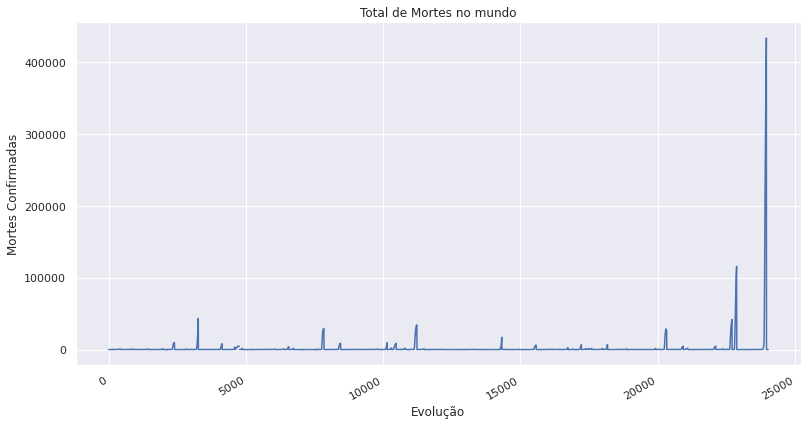

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13, 7))
sns.set()


ax.plot('total_deaths', data=df);
ax.set_title('Total de Mortes no mundo')
ax.set_xlabel("Evolução")
ax.set_ylabel("Mortes Confirmadas")
fig.autofmt_xdate()
plt.show()

# Análise Eploratória para o Brasil 

### Vamos analisar agora nessa base de dados apenas os registros do Brasil e tentar identificar: 
* O dia que foi registrado o primeiro caso de infecção no Brasil.
* Quantos dias demorou para registrarmos a primeira morte, considerando o pimeiro caso registrado.

> Para observarmos apenas os dados referentes ao Brasil, vamos criar uma variável e atribuir a ela uma cópia dos registros apenas do Brasil.

> Como iremos trabalhar basicamente com a variável data, transformaremos a coluna data como index.

In [20]:
# Cópia para uma varável com dados exclusivos do Brasil
df_brasil = df.loc[df.location == 'Brazil'].copy()

# Transformar a coluna date como index.
df_brasil.set_index('date', inplace=True)

In [21]:
# Visualizar as 5 primeiras entradas
df_brasil.head()

,iso_code,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-31,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
2020-01-01,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
2020-01-02,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
2020-01-03,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
2020-01-04,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2


> ### Agora que trabalhamos com os dados exclusivos do Brasil e com a coluna 'date', descobriremos o dia do primeiro caso e a primeira morte registrados no Brasil.

In [22]:
df_brasil.loc[df_brasil.total_cases != 0, ['total_cases']].sort_values(by='total_cases',ascending=True)

,total_cases
date,
2020-02-26,1.0
2020-02-27,1.0
2020-02-28,1.0
2020-02-29,1.0
2020-03-01,2.0
...,...
2020-06-11,772416.0
2020-06-12,802828.0
2020-06-13,828810.0


> ### O primeiro caso no Brasil ocorreu no dia 26 de Fevereiro de 2020.

In [23]:
df_brasil.loc[df_brasil.total_deaths != 0, ['total_deaths']].sort_values(by='total_deaths',ascending=True)

,total_deaths
date,
2020-03-18,1.0
2020-03-19,4.0
2020-03-20,6.0
2020-03-21,11.0
2020-03-22,18.0
...,...
2020-06-11,39680.0
2020-06-12,40919.0
2020-06-13,41828.0


> ### Como podemos obsevar, a primeira morte no Brasil por COVID-19 foi em 18 de Março de 2020, 3 semanas após o primeiro caso. 

> #### Agora vamos visualizar em gráficos de linha e em escalas linear e logarítmica para quantidade casos e para quantidade de mortes. 

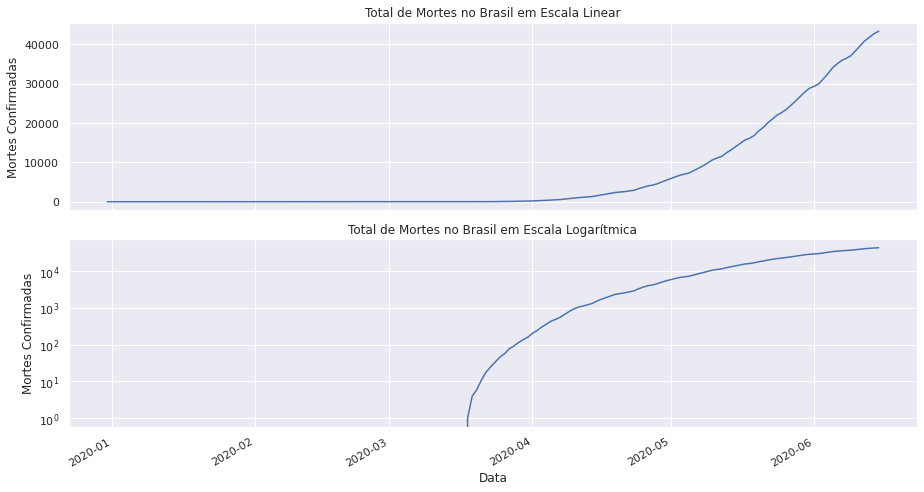

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(13, 7))
sns.set()

# Mortes no Brasil
ax[0].plot('total_deaths', data=df_brasil);
ax[0].set_title('Total de Mortes no Brasil em Escala Linear')
ax[0].set_xlabel("Data")
ax[0].set_ylabel("Mortes Confirmadas")
# ax[0].set_yscale('log')
fig.autofmt_xdate()

# Casos no Brasil
ax[1].plot('total_deaths', data=df_brasil);
ax[1].set_title('Total de Mortes no Brasil em Escala Logarítmica')
ax[1].set_xlabel("Data")
ax[1].set_ylabel("Mortes Confirmadas")
ax[1].set_yscale('log')
fig.autofmt_xdate()

plt.tight_layout()

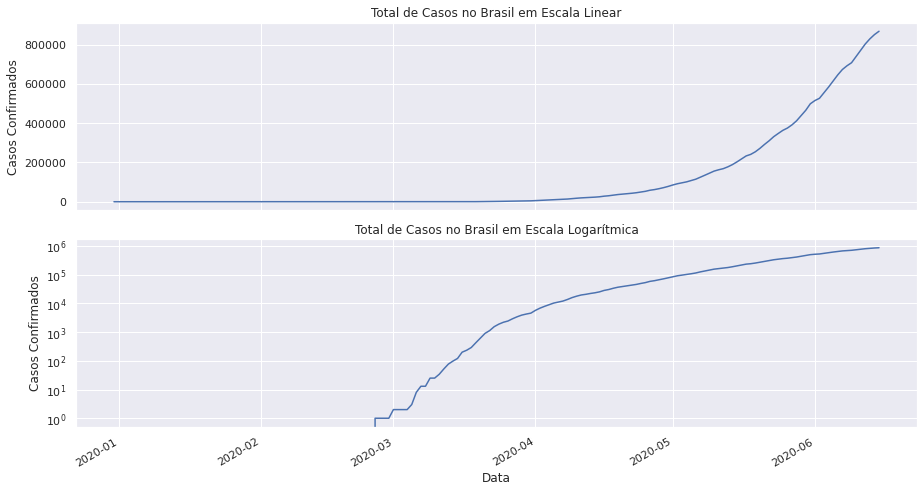

In [25]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(13, 7))
sns.set()

# Mortes no Brasil
ax[0].plot('total_cases', data=df_brasil);
ax[0].set_title('Total de Casos no Brasil em Escala Linear')
ax[0].set_xlabel("Data")
ax[0].set_ylabel("Casos Confirmados")
# ax[0].set_yscale('log')
fig.autofmt_xdate()

# Casos no Brasil
ax[1].plot('total_cases', data=df_brasil);
ax[1].set_title('Total de Casos no Brasil em Escala Logarítmica')
ax[1].set_xlabel("Data")
ax[1].set_ylabel("Casos Confirmados")
ax[1].set_yscale('log')
fig.autofmt_xdate()

plt.tight_layout()

O conjunto de dados usado aqui é simples, porém ideal para uma abordagem inicial, para se criar uma consciência situacional a respeito do COVID-19.

Podemos ver que é uma doença que vem causando um alto número de mortes e tem uma alta taxa de contaminação, mas que é possível diminuir esse contágio. 

Podemos num próximo passo desse estudo tratar os dados faltantes e analisar o motivo de China e Índia possuirem maior população e ainda assim não estarem no topo dos casos de contaminação.  